**Loading** **The** **libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Importing** **The** **dataset**

In [ ]:
df = pd.read_csv('Prime TV Shows Data set.csv', encoding = 'latin1')

In [ ]:
df.head()

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+


In [ ]:
df.tail()

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.no.                    404 non-null    int64  
 1   Name of the show         393 non-null    object 
 2   Year of release          393 non-null    float64
 3   No of seasons available  393 non-null    float64
 4   Language                 393 non-null    object 
 5   Genre                    393 non-null    object 
 6   IMDb rating              182 non-null    float64
 7   Age of viewers           393 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 25.4+ KB


In [ ]:
df.describe()

,S.no.,Year of release,No of seasons available,IMDb rating
count,404.000000,393.000000,393.000000,182.000000
mean,202.500000,2011.279898,2.608142,7.354396
std,116.769003,12.944861,2.592008,0.959372
min,1.000000,1926.000000,1.000000,3.700000
25%,101.750000,2011.000000,1.000000,6.900000
50%,202.500000,2016.000000,2.000000,7.500000
75%,303.250000,2018.000000,3.000000,8.100000
max,404.000000,2020.000000,20.000000,9.000000


**Renaming** **the** **columns**

In [ ]:
df.rename(columns={
    'S.no.': 'Sno',
    'Name of the show': 'Title',
    'Year of release': 'Year',
    'No of seasons available': 'Seasons',
    'Language': 'Language',
    'Genre': 'Genre',
    'IMDb rating': 'IMDb',
    'Age of viewers': 'Age'
}, inplace=True)

In [ ]:
df.columns

Index(['Sno', 'Title', 'Year', 'Seasons', 'Language', 'Genre', 'IMDb', 'Age'], dtype='object')

In [ ]:
print(df.columns.tolist())

['Sno', 'Title', 'Year', 'Seasons', 'Language', 'Genre', 'IMDb', 'Age']


**Handle** **Missing** **values**

In [ ]:
df.dropna(inplace=True)

**Convert** **IDMB** **rating** **to** **Number**

In [ ]:
df['IMDb'] = pd.to_numeric(df['IMDb'], errors='coerce')
df.dropna(subset=['IMDb'], inplace=True)

**Creating** **new** **column** **called** **Popular**

In [ ]:
df['Popular'] = df['IMDb'].apply(lambda x: 1 if x >= 7.5 else 0)

**Encoding** **Categeorical** **columns**

In [ ]:
le_genre = LabelEncoder()
le_lang = LabelEncoder()
le_age = LabelEncoder()

df['Genre_encoded'] = le_genre.fit_transform(df['Genre'])
df['Language_encoded'] = le_lang.fit_transform(df['Language'])
df['Age_encoded'] = le_age.fit_transform(df['Age'])

**Preprocessing the Text**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

print("NLTK resources are now ready to use.")

NLTK resources are now ready to use.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

**Bar** **chart**

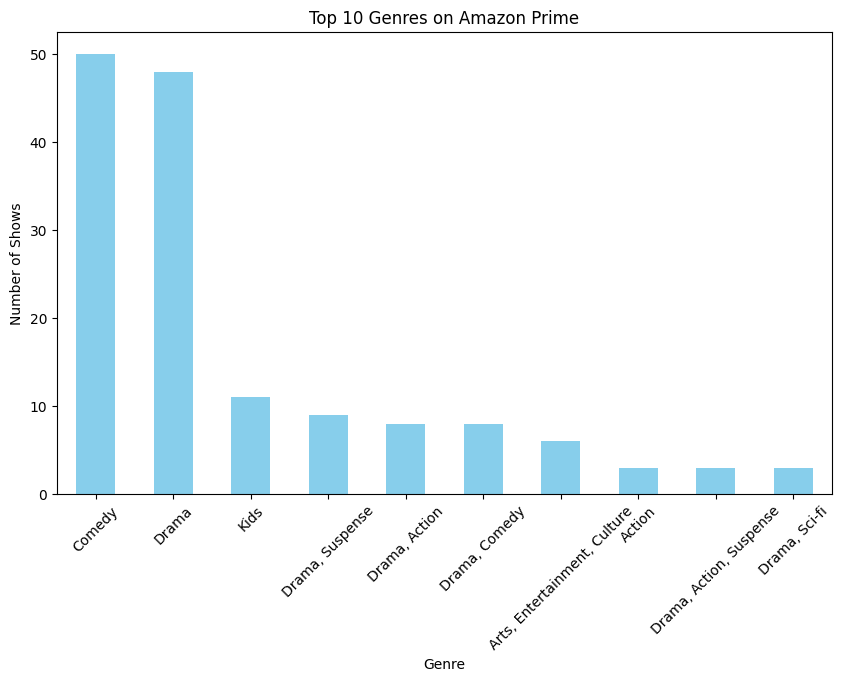

In [ ]:
plt.figure(figsize=(10, 6))
df['Genre'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres on Amazon Prime')
plt.xlabel('Genre')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()

**Pie** **chart**

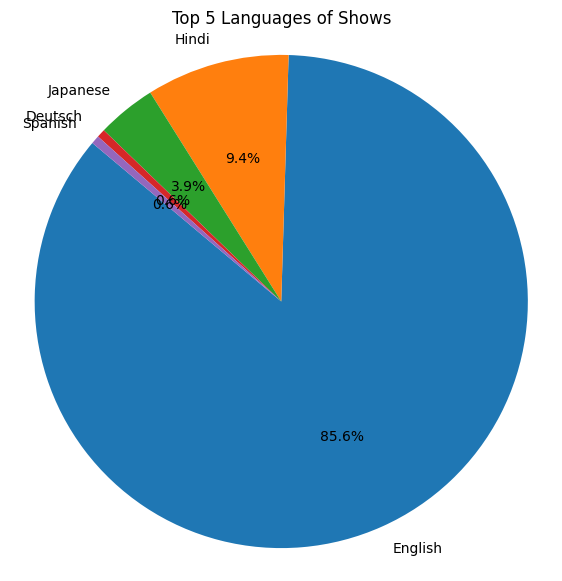

In [ ]:
lang_counts = df['Language'].value_counts().head(5)  # Top 5 languages
plt.figure(figsize=(7, 7))
plt.pie(lang_counts, labels=lang_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Languages of Shows')
plt.axis('equal')
plt.show()

**Histogram**

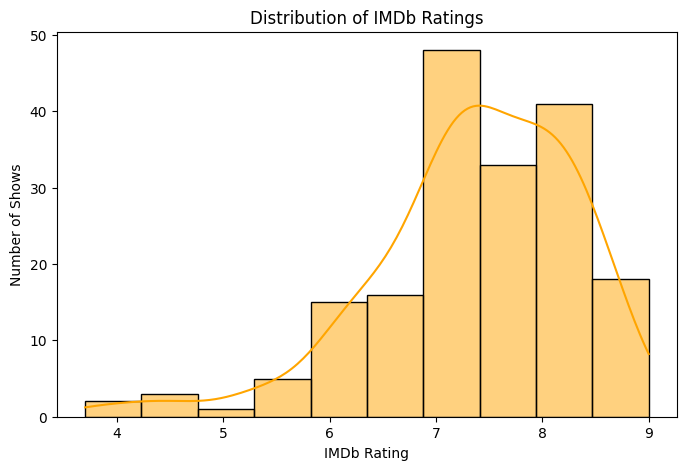

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['IMDb'], bins=10, kde=True, color='orange')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Shows')
plt.show()

**Box** **Plots**

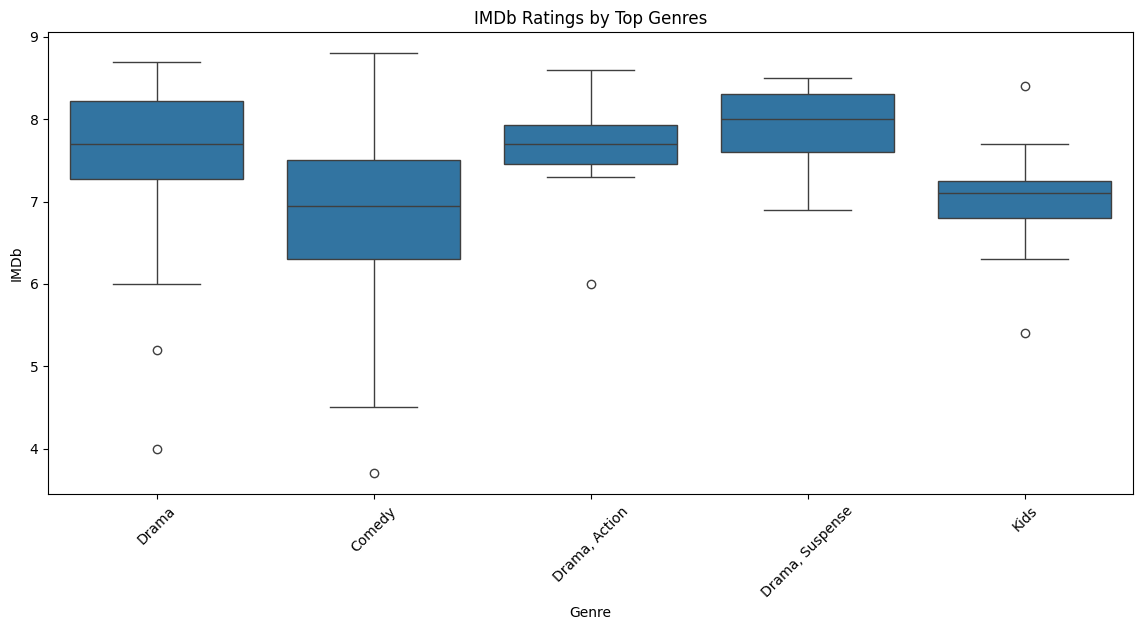

In [ ]:
plt.figure(figsize=(14, 6))
top_genres = df['Genre'].value_counts().index[:5]  # Top 5 only
sns.boxplot(x='Genre', y='IMDb', data=df[df['Genre'].isin(top_genres)])
plt.title('IMDb Ratings by Top Genres')
plt.xticks(rotation=45)
plt.show()

**Line** **Chart**

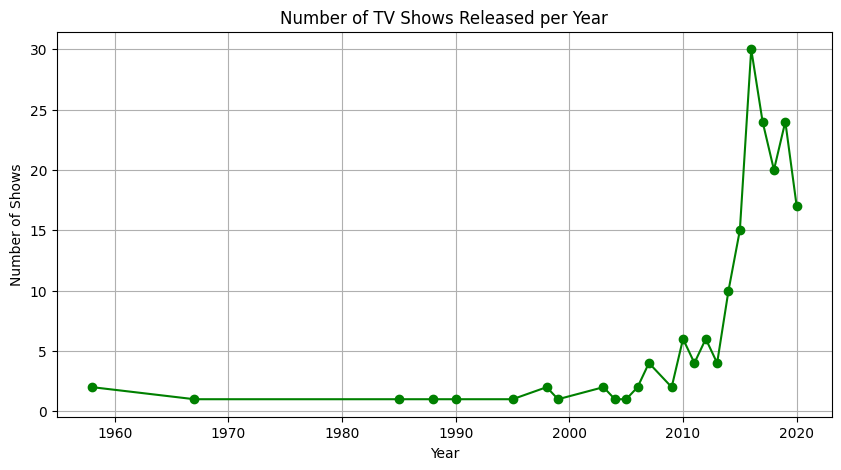

In [ ]:
plt.figure(figsize=(10, 5))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Number of TV Shows Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.show()

**Scatter** **Plots**

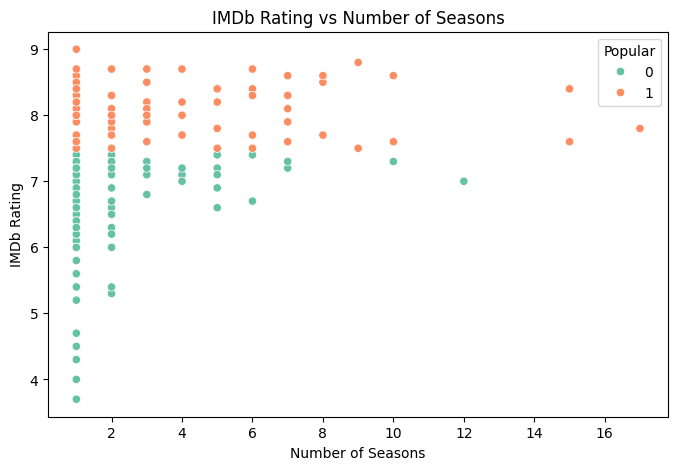

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Seasons', y='IMDb', data=df, hue='Popular', palette='Set2')
plt.title('IMDb Rating vs Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('IMDb Rating')
plt.show()

**Donut** **chart**

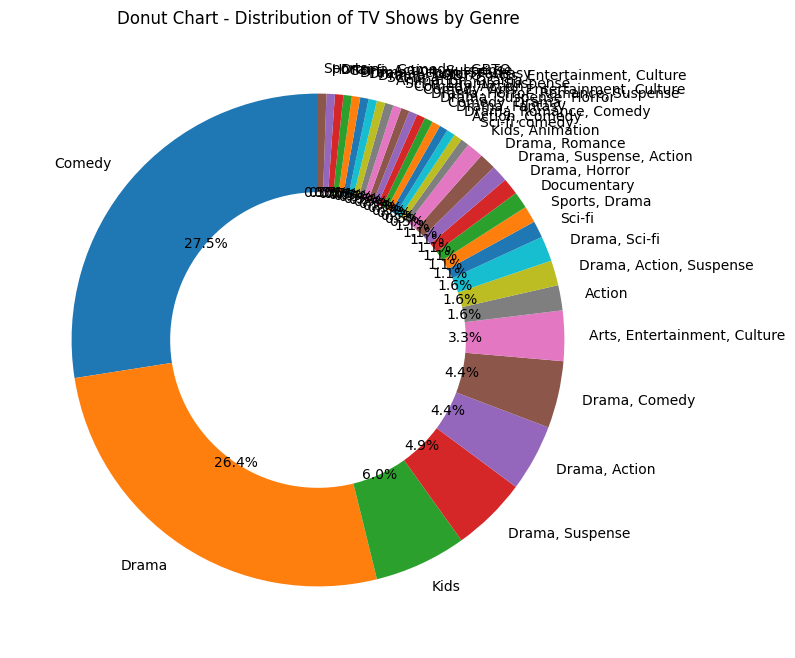

In [ ]:
import matplotlib.pyplot as plt

# Count genres
genre_counts = df['Genre'].value_counts()

# Donut chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts,
        labels=genre_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width': 0.4})  # this makes the donut hole

plt.title('Donut Chart - Distribution of TV Shows by Genre')
plt.show()

In [ ]:
# First, check the unique values
print(df['Age'].unique())

['18+' '16+' '7+' 'All' '13+']


**Coorelation** **Heat** **Map**

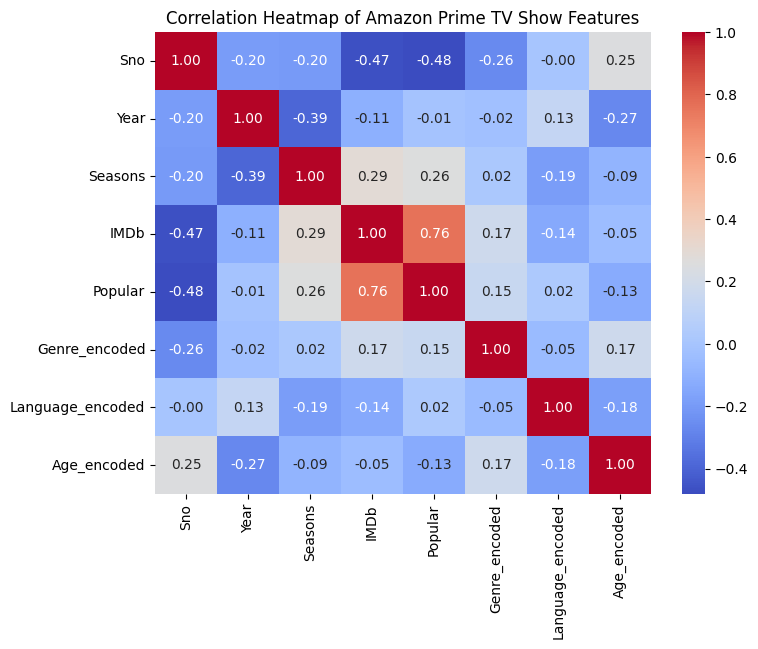

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation
correlation = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Amazon Prime TV Show Features')
plt.show()

**Word** **Cloud**

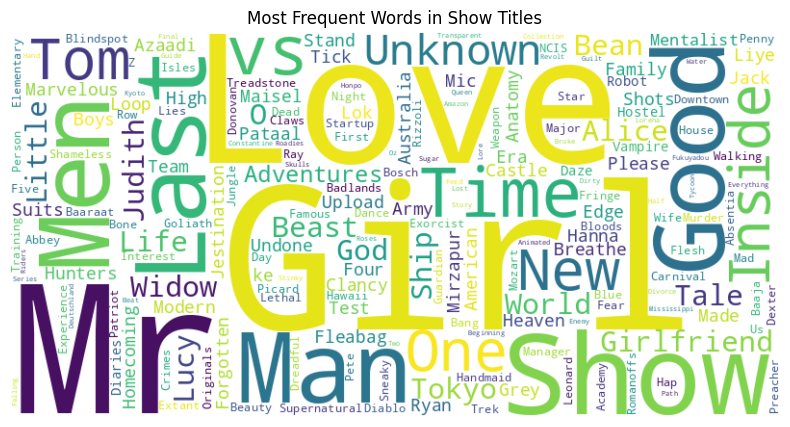

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['Title'].dropna())  # or df['Description']
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Show Titles")
plt.show()

**Trend** **Analysis**

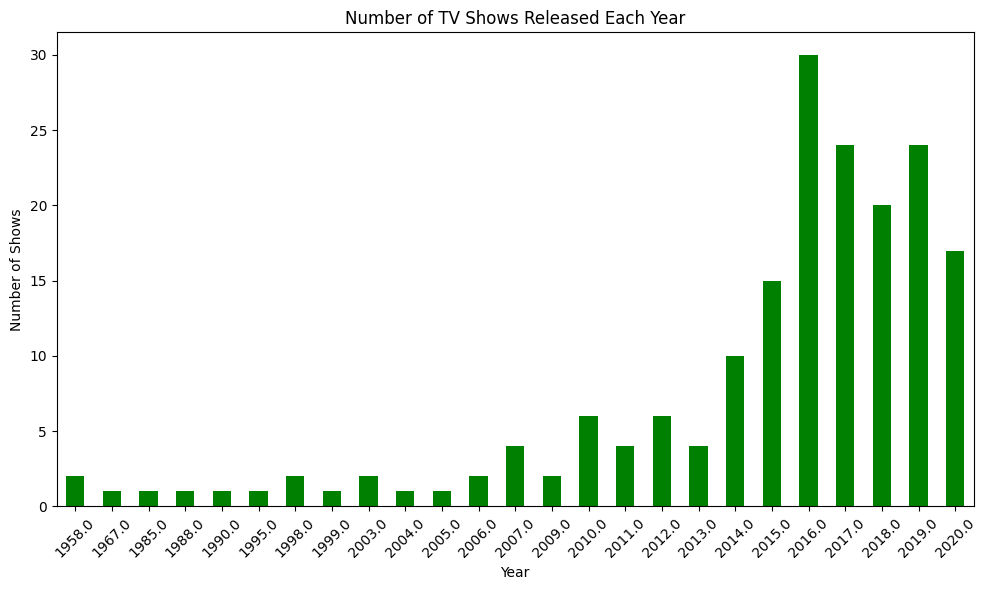

In [ ]:
# Number of shows released per year
plt.figure(figsize=(10, 6))
df['Year'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Number of TV Shows Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Feature** **and** **Target** **Variable**

In [ ]:
# Features and target variable
features = ['Year', 'Seasons', 'IMDb', 'Genre_encoded', 'Language_encoded', 'Age_encoded']
target = 'Popular'  # This is your label (1 for popular, 0 for not popular)

X = df[features]
y = df[target]

**Train-Test** **Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training** **The** **model**

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**Evaluating the model**

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        20

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



**Displaying Confusion Matrix**

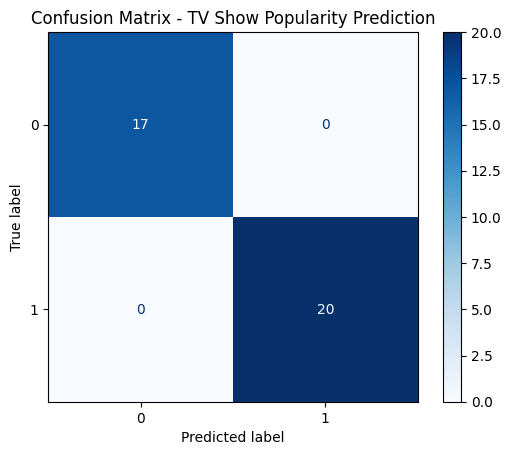

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - TV Show Popularity Prediction")
plt.show()



**Predicting the model**

In [ ]:
# Example: predict if a new show is popular
new_show = pd.DataFrame({
    'Year': [2024],
    'Seasons': [2],
    'IMDb': [8.5],
    'Genre_encoded': [3],
    'Language_encoded': [1],
    'Age_encoded': [2]
})

prediction = model.predict(new_show)
print("Popular:" if prediction[0] == 1 else "Not Popular")

NameError: name 'model' is not defined

In [ ]:
# Example input for a likely "not popular" show
new_show = pd.DataFrame({
    'Year': [2015],              # older show
    'Seasons': [1],              # only one season
    'IMDb': [5.5],               # lower IMDb score
    'Genre_encoded': [6],        # assume this maps to a niche genre
    'Language_encoded': [4],     # assume less common language
    'Age_encoded': [0]           # suitable for all ages
})

# Predict
prediction = model.predict(new_show)

# Output
print("Prediction:", "Popular" if prediction[0] == 1 else "Not Popular")

Prediction: Not Popular
